### Importing Libraries

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from numpy import asarray
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

### Importing CSV 

In [162]:
churnData = pd.read_csv("DATA_Customer-Churn.csv",index_col = 0)
churnData

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,
Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No


In [163]:
#### Checking numerical columns

In [164]:
numerical_df = churnData._get_numeric_data()
numerical_df

,SeniorCitizen,tenure,MonthlyCharges
gender,,,
Female,0,1,29.85
Male,0,34,56.95
Male,0,2,53.85
Male,0,45,42.30
Female,0,2,70.70
...,...,...,...
Male,0,24,84.80
Female,0,72,103.20
Female,0,11,29.60


#### Checking Categorical columns

In [165]:
categoricals_df = churnData.select_dtypes('object')
categoricals_df

,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,TotalCharges,Churn
gender,,,,,,,,,,,,
Female,Yes,No,No,No,Yes,No,No,No,No,Month-to-month,29.85,No
Male,No,No,Yes,Yes,No,Yes,No,No,No,One year,1889.5,No
Male,No,No,Yes,Yes,Yes,No,No,No,No,Month-to-month,108.15,Yes
Male,No,No,No,Yes,No,Yes,Yes,No,No,One year,1840.75,No
Female,No,No,Yes,No,No,No,No,No,No,Month-to-month,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
Male,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,1990.5,No
Female,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,One year,7362.9,No
Female,Yes,Yes,No,Yes,No,No,No,No,No,Month-to-month,346.45,No


### Converting Total charges column to numercial column

In [166]:
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'],errors='coerce' )
churnData['TotalCharges']

gender
Female      29.85
Male      1889.50
Male       108.15
Male      1840.75
Female     151.65
           ...   
Male      1990.50
Female    7362.90
Female     346.45
Male       306.60
Male      6844.50
Name: TotalCharges, Length: 7043, dtype: float64

#### Re-checking type of the column

In [167]:
churnData.TotalCharges.dtype

dtype('float64')

In [168]:
churnData

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,
Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No


#### Checking for null values

In [169]:
churnData.isnull().sum(axis = 0)

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### filling the Null values with mean

In [170]:
mean_TotalCharges = np.mean(churnData['TotalCharges'])
churnData['TotalCharges'] == churnData['TotalCharges'].fillna(mean_TotalCharges, inplace = True)
churnData


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
gender,,,,,,,,,,,,,,,
Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.50,No
Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.90,No
Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No


In [171]:
numerical_df = churnData._get_numeric_data()
numerical_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
gender,,,,
Female,0,1,29.85,29.85
Male,0,34,56.95,1889.50
Male,0,2,53.85,108.15
Male,0,45,42.30,1840.75
Female,0,2,70.70,151.65
...,...,...,...,...
Male,0,24,84.80,1990.50
Female,0,72,103.20,7362.90
Female,0,11,29.60,346.45


### X y split, Train-test split, std_scaler

In [172]:
# X Y split
X = numerical_df
y = churnData.Churn


In [173]:
# Train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30,random_state=123)

In [174]:
std_scaler=StandardScaler().fit(X_train)
X_train_scaled=std_scaler.transform(X_train)
X_test_scaled=std_scaler.transform(X_test)

In [175]:
X_train.shape

(4930, 4)

### Knn_Classification

In [176]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2,weights='uniform')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
#model.predict_proba(inputdata)

In [177]:
y_train

gender
Female     No
Male       No
Female     No
Male       No
Male      Yes
         ... 
Male       No
Male       No
Female    Yes
Female     No
Female     No
Name: Churn, Length: 4930, dtype: object

### classification_plot_confusion_matrix
<b>Classification Model confusion matrix for training and test set

/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


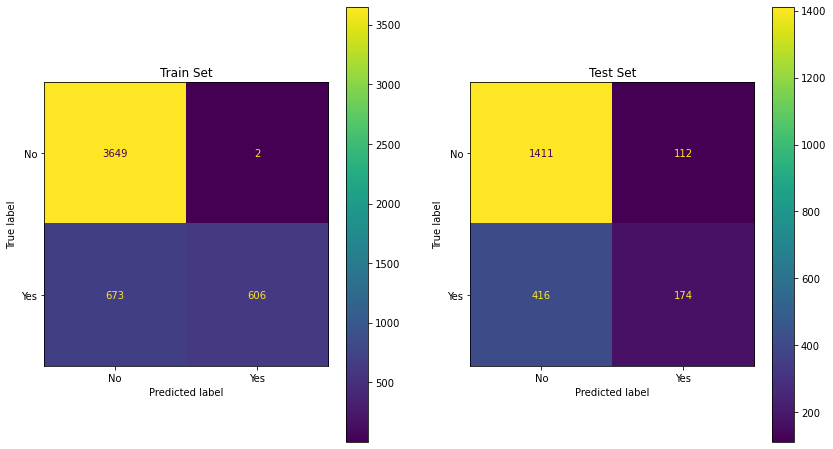

In [178]:
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

### Logistic regresion

,Error_metric,Train,Test
0,Accuracy,0.798174,0.772362
1,Precision,0.664733,0.649315
2,Recall,0.448006,0.401695


Confusion matrix for the train set
[[3362  289]
 [ 706  573]]


/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


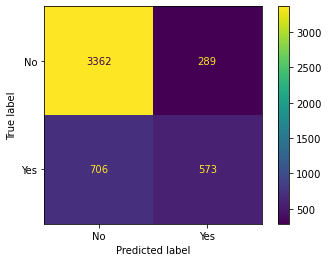



Confusion matrix for the test set
[[1395  128]
 [ 353  237]]


/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


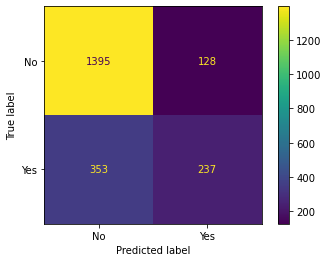

In [179]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log,average="binary", pos_label='Yes'),
                                         recall_score(y_train, y_pred_train_log,average="binary", pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log,average="binary", pos_label='Yes'),
                                        recall_score(y_test, y_pred_test_log,average="binary", pos_label='Yes')]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()


### Decision trees

,Error_metric,Train,Test
0,Accuracy,0.863083,0.650734
1,Precision,0.996711,0.288571
2,Recall,0.473808,0.171186


/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/saksham/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


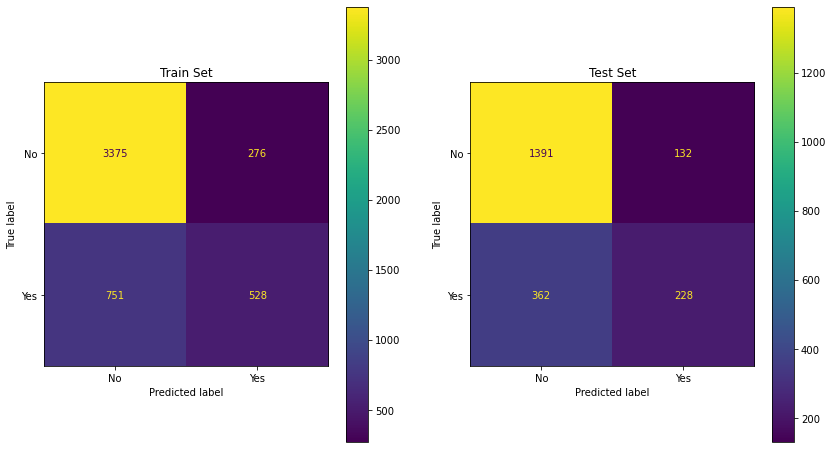

In [181]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)


performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train,average="binary", pos_label='Yes'),
                                         recall_score(y_train, y_pred_train,average="binary", pos_label='Yes')],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,average="binary", pos_label='Yes'),
                                        recall_score(y_test, y_pred_test,average="binary", pos_label='Yes')]})

display(performance)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")